## 기사 가져오기

In [104]:
import pandas as pd
file_path = '수도권_아파트_청약_뉴스_크롤링_청약기간내.csv'
df = pd.read_csv(file_path)
df

,공고번호,apartment,title,content,url
0,2025000043,부천 JY 포에시아,'안동용상하늘채리버스카이' 등 1205가구 분양예정[분양캘린더],견본주택 '용현우방아이유쉘센트럴마린' 개관[서울=뉴시스][서울=뉴시스]정진형 기자 ...,https://n.news.naver.com/mnews/article/003/001...
1,2025000043,부천 JY 포에시아,다음 주 전국 분양물량 1205가구에 그쳐…서울은 '無',다음 주 분양 물량이 전주의 절반에도 미치지 못하는 1200여가구에 그칠 것으로 보...,https://n.news.naver.com/mnews/article/277/000...
2,2025000043,부천 JY 포에시아,분양 성수기인데…내주 전국서 1205가구 공급 그쳐,부동산R114 주간 부동산 분양 캘린더봄철 분양 성수기에도 분양 시장은 침체기가 이...,https://n.news.naver.com/mnews/article/015/000...
3,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),"3월 첫째주, 전국 2334가구 청약…지방 물량 집중",전국 6곳 청약 접수서울·인천 수도권 2곳3월 첫째 주 전국 6곳에서 총 2334가...,https://n.news.naver.com/mnews/article/277/000...
4,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),[주간분양] 수도권 청약 물량 희귀…전국 2334가구 중 35가구,전국 6곳 중 4곳이 지방…2299가구 공급28일 리얼투데이에 따르면 3월 첫째 주...,https://n.news.naver.com/mnews/article/119/000...
...,...,...,...,...,...
1948,2020000312,르엘 신반포,“현금부자 몰렸다”…르엘신반포 청약 당첨가점 최고 74점,"커트라인 62점, 매매시장 침체에도 청약열기 고조10억원 안팎 시세차익 기대감 현금...",https://n.news.naver.com/mnews/article/016/000...
1949,2020000312,르엘 신반포,코로나19에도 식을 줄 모르는 '청약 광풍'…왜?,"""당첨되면 로또""…규제지역서도 청약경쟁률 수백 대 일 껑충규제·비(非)규제 모두 청...",https://n.news.naver.com/mnews/article/003/000...
1950,2020000298,시흥장현 영무예다음,최고 경쟁률 기록한 '시흥장현영무예다음'···커트라인도 高高,[서울경제] 2·20 대책에 따른 2차 풍선효과 혜택을 보고 있는 시흥시에서 청약 ...,https://n.news.naver.com/mnews/article/011/000...
1951,2020000298,시흥장현 영무예다음,경기 비규제지역 '안시성' 청약률 '高高',아파트값 상대적으로 낮고청약조건 까다롭지 않아 인기정부의 잇단 규제 대책에6억 이하...,https://n.news.naver.com/mnews/article/015/000...


## DTM 만들기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 형태소 분석기 설정
okt = Okt()

# 불용어 정리
with open('stopwords-ko.txt', 'r') as f:
  list_file = f.readlines() 
stopwords_default = [word[:-1] for word in list_file ]
stopwords_default
stopwords = stopwords_default # 기본

# 1. 텍스트 정제 함수 (특수문자, 숫자 제거)
def clean_text(text):
    text = re.sub(r'\([^)]*\)', '', text)  # 괄호 안 내용 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백 제외 문자 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 연속 공백 제거
    return text

# 2. 형태소 분석을 통한 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 형태소만 추출
    nouns = [word for word in nouns if word not in stopwords and len(word) > 1]  # 불용어 제거 및 한 글자 단어 제외
    return ' '.join(nouns)

# 3. 전체 데이터 전처리
corpus = df['content'][:100].tolist()
cleaned_corpus = [extract_nouns(clean_text(text)) for text in corpus]  # 정제 + 명사 추출

# 4. 벡터화 (CountVectorizer 사용)
vectorizer = CountVectorizer(
    max_df=0.9,  # 전체 문서의 90% 이하에서 등장한 단어만 사용 (더 보편적인 단어 포함)
    min_df=2,    # 최소 1번 이상 등장한 단어 포함 (희소 단어도 반영)
    max_features=3000,
    ngram_range=(1, 2),  # unigram + bigram + trigram 사용
    # token_pattern=r'\b\w+\b'  # 숫자 포함 단어도 추출 가능
)

dtm = vectorizer.fit_transform(cleaned_corpus)  # 전처리된 데이터로 DTM 생성
dtm.shape

(100, 3000)

In [111]:
# 추출된 단어 리스트 출력
words = vectorizer.get_feature_names_out()
print("✅ 추출된 키워드 목록:", words[:1000])

✅ 추출된 키워드 목록: ['가가' '가가 억만원' '가가 억원' '가가 일산' '가가 책정' '가가 최고' '가격' '가격 경쟁력' '가격 공급'
 '가격 메리트' '가격 분양' '가격 상승' '가격 억만원' '가격 지역' '가격 희비' '가구' '가구 가구' '가구 강조'
 '가구 거실' '가구 건립' '가구 경남' '가구 고양시' '가구 공급' '가구 광주' '가구 구성' '가구 규모' '가구 기준'
 '가구 내년' '가구 대구' '가구 대규모' '가구 만가' '가구 만점' '가구 모집' '가구 배정' '가구 부산' '가구 분양'
 '가구 블록' '가구 서울' '가구 선분' '가구 세종' '가구 수도권' '가구 수준' '가구 순이' '가구 아파트' '가구 예정'
 '가구 울산' '가구 이전' '가구 일반' '가구 전남' '가구 전북' '가구 전용' '가구 조성' '가구 조합원' '가구 주거지'
 '가구 주택' '가구 지난' '가구 지방' '가구 청약' '가구 타입' '가구 특별' '가까이' '가까이 백마역' '가까이 위치'
 '가능' '가능 래미안' '가능성' '가도' '가도 분석' '가라' '가라 평가' '가량' '가량 시세' '가량 차이' '가로'
 '가로 공급' '가로 트리플' '가성' '가운데' '가운데 건설' '가운데 분양' '가운데 서울' '가운데 일반' '가운데 전용'
 '가인' '가입' '가입 기간' '가입자' '가장' '가장 수준' '가장 지하철역' '가점' '가점 가구' '가점 기록'
 '가점 상대' '가점 전용' '가점 최고' '가점 최저' '가점 추첨' '가족' '가족 청약' '가지' '가지 무상' '가치'
 '가치 기대' '가치 요소' '갈수록' '갈수록 가운데' '갈수록 분양' '감소' '감안' '감안 선방' '감안 수요'
 '감안 시세' '강남' '강남 강변' '강남 분대' '강남 분양' '강남 서초구' '강남 아파트' '강남 청약' '강남구'
 '강동구' '강변' '강변 도시' '강변 아파트' '강변북로' '강변북로 공항대로'

## LDA 학습

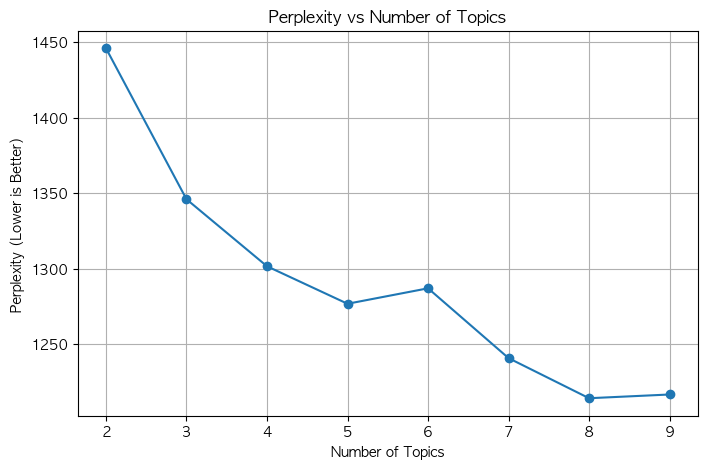

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 2. 최적 토픽 개수 찾기
perplexities = []
topic_range = range(2, 10)  # 토픽 개수 2개 ~ 10개 테스트

for n_topics in topic_range:
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        doc_topic_prior=0.1, 
        max_iter=10,  # 충분한 학습 횟수
        learning_method='batch',  # 안정적인 batch 학습
        random_state=42,
        n_jobs=-1  # 병렬 처리
    )
    lda.fit(dtm)
    perplexities.append(lda.perplexity(dtm))  # perplexity 저장

# 3. Perplexity 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.xticks(topic_range)
plt.grid()
plt.show()


In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import pprint

# 1. LDA 모델 학습 (n_components=9로 설정)
lda = LatentDirichletAllocation(
    n_components=9, 
    doc_topic_prior=0.1, 
    random_state=42
)
lda.fit(dtm)

# 2. 토픽별 주요 키워드 출력
topic_names = [f'토픽 {i}' for i in range(1, 10)] 

terms = vectorizer.get_feature_names_out()
topic_keywords = {}

for i, topic in enumerate(lda.components_):
    top_keywords = [terms[j] for j in topic.argsort()[-10:][::-1]]  # 상위 10개 키워드 (역순 정렬)
    topic_keywords[topic_names[i]] = top_keywords

# 3. 기사별 주요 토픽 점수 출력 (DataFrame 활용)
doc_topic = lda.transform(dtm)

results = []
for i, topic_dist in enumerate(doc_topic):
    top_topic = topic_dist.argmax()
    result = {
        '기사 번호': i + 1,
        '주요 토픽': topic_names[top_topic],
    }
    result.update({topic_names[j]: round(topic_dist[j], 4) for j in range(len(topic_names))})  # 소수점 4자리 반올림
    results.append(result)

df_results = pd.DataFrame(results)

# 4. 결과 출력
print("\n[토픽별 주요 키워드]")
pprint.pprint(topic_keywords)



[토픽별 주요 키워드]
{'토픽 1': ['가구', '서울', '전용', '아파트', '래미안', '경쟁률', '당첨', '물량', '공급', '가점'],
 '토픽 2': ['가구', '평택', '가구 가구', '전용', '공급', '시티', '면적', '예정', '공원', '지상'],
 '토픽 3': ['세대', '블록', '순위', '곤지암', '풍경', '스카이', '서울', '공급', '퍼스트', '규모'],
 '토픽 4': ['세대', '공급', '일산', '당첨', '한세상', '포레', '순위', '접수', '특별 공급', '특별'],
 '토픽 5': ['인천', '지구', '세대', '건설', '전용', '공급', '예정', '신도시', '아파트', '순위'],
 '토픽 6': ['서울', '전용', '경쟁률', '대출', '순위', '가구', '기록', '부동산', '주택', '공급'],
 '토픽 7': ['가구', '아파트', '공급', '아크', '순위', '예정', '경쟁률', '전용', '접수', '주택'],
 '토픽 8': ['곤지암', '덕소역', '순위', '아파트', '센트럴', '문산역', '파주', '서울', '개발', '공급'],
 '토픽 9': ['평택', '브레인 시티', '브레인', '시티', '블록', '가구', '평택 브레인', '전용', '신도시', '순위']}


In [115]:
import pandas as pd

# 기사별 주요 토픽 점수 출력
doc_topic = lda.transform(dtm)

# 토픽 이름 설정
topic_names = [f'토픽 {i}' for i in range(1, 10)] 

# 기사별 토픽 비율 정리 (테이블 형식)
topic_df = pd.DataFrame(doc_topic, columns=topic_names)
topic_df.insert(0, '기사 번호', range(1, len(topic_df) + 1))

# 주요 토픽 추가
topic_df['주요 토픽'] = topic_df[topic_names].idxmax(axis=1)

# 결과 출력 (테이블 형식)
topic_df.head(20)


,기사 번호,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,토픽 6,토픽 7,토픽 8,토픽 9,주요 토픽
0,1,0.000451,0.928842,0.000451,0.000451,0.000451,0.000451,0.000451,0.068002,0.000451,토픽 2
1,2,0.363059,0.628791,0.001164,0.001164,0.001164,0.001164,0.001164,0.001164,0.001164,토픽 2
2,3,0.346191,0.649230,0.000654,0.000654,0.000654,0.000654,0.000654,0.000654,0.000654,토픽 2
3,4,0.000516,0.862092,0.000516,0.000516,0.134297,0.000516,0.000516,0.000516,0.000516,토픽 2
4,5,0.000294,0.997646,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,0.000294,토픽 2
5,6,0.000330,0.997359,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,토픽 2
6,7,0.995852,0.000519,0.000518,0.000519,0.000519,0.000519,0.000519,0.000518,0.000518,토픽 1
7,8,0.608627,0.000578,0.000578,0.000578,0.000579,0.164039,0.000579,0.223863,0.000579,토픽 1
8,9,0.997942,0.000257,0.000257,0.000257,0.000257,0.000257,0.000257,0.000257,0.000257,토픽 1
9,10,0.000736,0.000736,0.000736,0.000736,0.994113,0.000736,0.000736,0.000736,0.000736,토픽 5


<Axes: xlabel='count', ylabel='주요 토픽'>

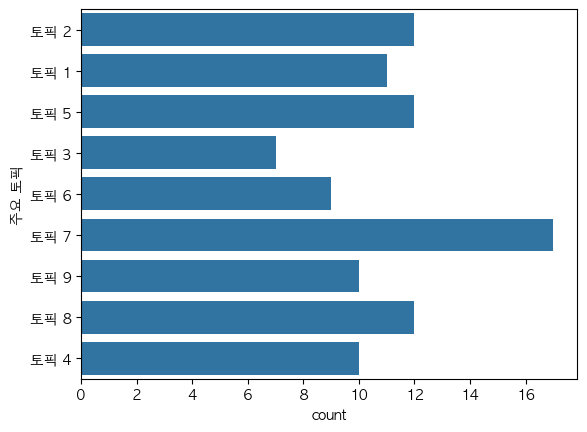

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

sns.countplot(topic_df['주요 토픽'])

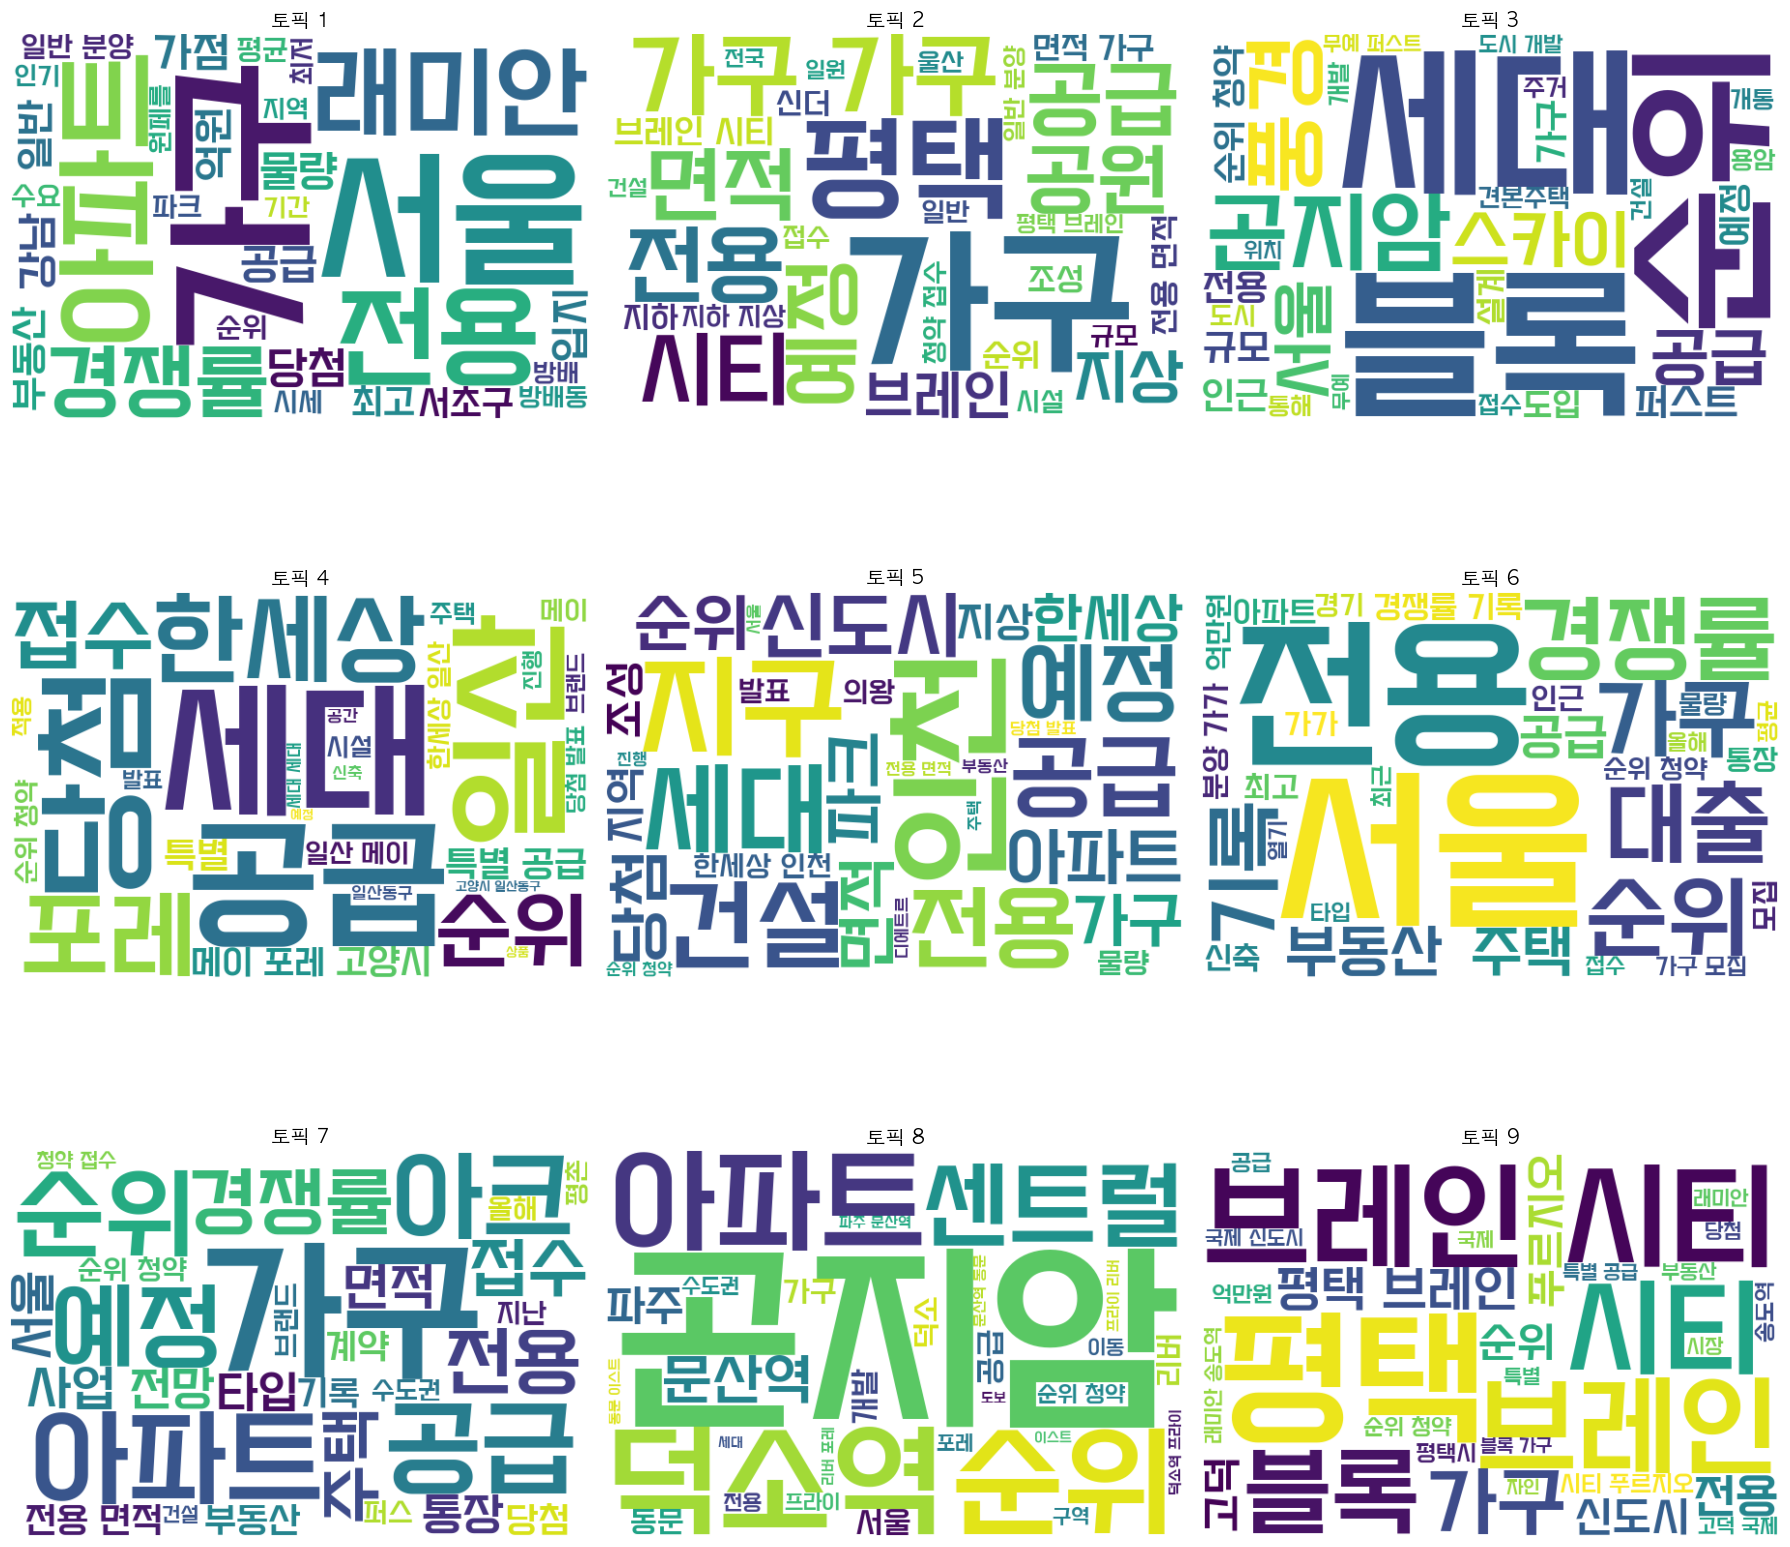

In [118]:
from wordcloud import WordCloud

# 피처 네임 (단어 목록)
feature_names = vectorizer.get_feature_names_out()

# 워드 클라우드 시각화 함수
def plot_wordcloud(lda_model, feature_names, topic_idx, ax):
    """ 특정 토픽에 대한 워드 클라우드를 그리는 함수 """
    topic = lda_model.components_[topic_idx]  # 토픽별 단어 가중치
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-30 - 1:-1]}  # 상위 30개 단어
    
    wordcloud = WordCloud(
        font_path = '/Library/Fonts/Y 너만을 비춤체.ttf',
        width=600, height=400, background_color='white'
    ).generate_from_frequencies(word_freq)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"토픽 {topic_idx + 1}", fontsize=14)
    ax.axis('off')

# 모든 토픽에 대한 워드 클라우드 출력
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # 2x2 서브플롯 (토픽 개수에 맞게 조절)
axes = axes.flatten()

for i in range(9):
    plot_wordcloud(lda, feature_names, i, axes[i])

plt.tight_layout()
plt.show()